# The Ordinary Sales Analysis

## Current steps:

    - You can do hot encoding for the product variable to count the products.
    - PCA to drop some variables. is not workng as I have categorical data.
    - Drop reviewer name variable.
    - Sentiment review analysis.
    - Product column converted into a DataFrame "One hot encoding"
   
## Use a performance evaluation metric such as RMSE (for Regression) or Accuracy Score (for Classification).


In [2]:
#import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the raw data set

df = pd.read_csv('the ordinary.csv')

In [4]:
#Consider this step important to get to know the variables better!

df

,brand_name,p_category,p_id,p_num_reviews,p_price,p_star,product,r_eyecolor,r_haircolor,r_review,r_skinconcerns,r_skintone,r_skintype,r_star,reviewer
0,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,brunette,I’ve been using this for almost a week now. I ...,acne,dark,oily,5,JenJoyWells
1,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,black,this is great. I use it as a part of my night ...,calluses,ebony,combination,5,Shaja221
2,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,brunette,Amazing product. I got a sample of Boscia’s ex...,acne,medium,oily,5,jz823
3,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,brunette,I can absolutely tell a difference to the text...,acne,porcelain,combination,5,heymadison
4,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,black,I have been using this product for three night...,blackheads,olive,combination,5,impulsebuyer7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,green,blonde,Only used this for two weeks now but I feel an...,acne,light,combination,5,msT33J4y
1205,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,brown,brunette,This product is amazing so I am still having a...,aging,light,oily,5,lindsey24
1206,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,brown,brunette,Magic. I put this on every night before bed an...,acne,tan,combination,5,mascarafeind
1207,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,green,brunette,I have skin like an oil-slick. I get bumps and...,acne,fair,oily,5,NaN


In [5]:
#Check the data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1209 non-null   object 
 1   p_category      1209 non-null   object 
 2   p_id            1209 non-null   object 
 3   p_num_reviews   1209 non-null   int64  
 4   p_price         1209 non-null   object 
 5   p_star          1209 non-null   float64
 6   product         1209 non-null   object 
 7   r_eyecolor      1182 non-null   object 
 8   r_haircolor     1190 non-null   object 
 9   r_review        1209 non-null   object 
 10  r_skinconcerns  1086 non-null   object 
 11  r_skintone      1197 non-null   object 
 12  r_skintype      1199 non-null   object 
 13  r_star          1209 non-null   int64  
 14  reviewer        1200 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 141.8+ KB


In [6]:
#Check the null values of the data set

df.isna().sum()

brand_name          0
p_category          0
p_id                0
p_num_reviews       0
p_price             0
p_star              0
product             0
r_eyecolor         27
r_haircolor        19
r_review            0
r_skinconcerns    123
r_skintone         12
r_skintype         10
r_star              0
reviewer            9
dtype: int64

In [7]:
#Convert the variable "product" into multiple columns in order to count the values and create visualizations

one_hot_encoding = pd.get_dummies(df['product']) #It's working!
one_hot_encoding = pd.DataFrame(one_hot_encoding)
one_hot_encoding

,100% Organic Cold-Pressed Rose Hip Seed Oil,Alpha Arbutin 2% + HA,Ascorbyl Tetraisopalmitate Solution 20% in Vitamin F,Azelaic Acid Suspension 10%,Buffet,Caffeine Solution 5% + EGCG,Glycolic Acid 7% Toning Solution,Granactive Retinoid* 2% Emulsion,High-Adherence Silicone Primer,Hyaluronic Acid 2% + B5,Lactic Acid 10% + HA 2%,Matrixyl* 10% + HA,Natural Moisturizing Factors + HA,Niacinamide 10% + Zinc 1%,Salicylic Acid 2% Solution,The No-Brainer Set,Vitamin C Suspension 23% + HA Spheres 2%,Vitamin C Suspension 30% in Silicone
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1206,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   100% Organic Cold-Pressed Rose Hip Seed Oil           1209 non-null   object
 1   Alpha Arbutin 2% + HA                                 1209 non-null   object
 2   Ascorbyl Tetraisopalmitate Solution 20% in Vitamin F  1209 non-null   object
 3   Azelaic Acid Suspension 10%                           1209 non-null   object
 4   Buffet                                                1209 non-null   object
 5   Caffeine Solution 5% + EGCG                           1209 non-null   object
 6   Glycolic Acid 7% Toning Solution                      1209 non-null   object
 7   Granactive Retinoid* 2% Emulsion                      1209 non-null   object
 8   High-Adherence Silicone Primer                        1209 non-null 

In [16]:
#As it seems that the variables of the new dataframe has a different data type other than "string"

all_columns = list(one_hot_encoding) # Creates list of all column headers
one_hot_encoding[all_columns] = one_hot_encoding[all_columns].astype(str)

In [17]:
#make sure that the formula is working correctly

one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   100% Organic Cold-Pressed Rose Hip Seed Oil           1209 non-null   object
 1   Alpha Arbutin 2% + HA                                 1209 non-null   object
 2   Ascorbyl Tetraisopalmitate Solution 20% in Vitamin F  1209 non-null   object
 3   Azelaic Acid Suspension 10%                           1209 non-null   object
 4   Buffet                                                1209 non-null   object
 5   Caffeine Solution 5% + EGCG                           1209 non-null   object
 6   Glycolic Acid 7% Toning Solution                      1209 non-null   object
 7   Granactive Retinoid* 2% Emulsion                      1209 non-null   object
 8   High-Adherence Silicone Primer                        1209 non-null 

In [22]:
#Concat the two dataframes all together vertically

data = pd.concat([df,one_hot_encoding], axis = 1)
data

,brand_name,p_category,p_id,p_num_reviews,p_price,p_star,product,r_eyecolor,r_haircolor,r_review,...,High-Adherence Silicone Primer,Hyaluronic Acid 2% + B5,Lactic Acid 10% + HA 2%,Matrixyl* 10% + HA,Natural Moisturizing Factors + HA,Niacinamide 10% + Zinc 1%,Salicylic Acid 2% Solution,The No-Brainer Set,Vitamin C Suspension 23% + HA Spheres 2%,Vitamin C Suspension 30% in Silicone
0,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,brunette,I’ve been using this for almost a week now. I ...,...,0,0,0,0,0,0,0,0,0,0
1,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,black,this is great. I use it as a part of my night ...,...,0,0,0,0,0,0,0,0,0,0
2,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,brunette,Amazing product. I got a sample of Boscia’s ex...,...,0,0,0,0,0,0,0,0,0,0
3,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,brunette,I can absolutely tell a difference to the text...,...,0,0,0,0,0,0,0,0,0,0
4,The Ordinary,Skincare,P427406,117,$8.70,4.7436,Glycolic Acid 7% Toning Solution,brown,black,I have been using this product for three night...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,green,blonde,Only used this for two weeks now but I feel an...,...,0,0,0,0,0,0,0,0,0,0
1205,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,brown,brunette,This product is amazing so I am still having a...,...,0,0,0,0,0,0,0,0,0,0
1206,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,brown,brunette,Magic. I put this on every night before bed an...,...,0,0,0,0,0,0,0,0,0,0
1207,The Ordinary,Skincare,P427418,79,$9.80,4.7848,Granactive Retinoid* 2% Emulsion,green,brunette,I have skin like an oil-slick. I get bumps and...,...,0,0,0,0,0,0,0,0,0,0


In [31]:
product_per_skincon = pd.DataFrame(product_per_skincon)


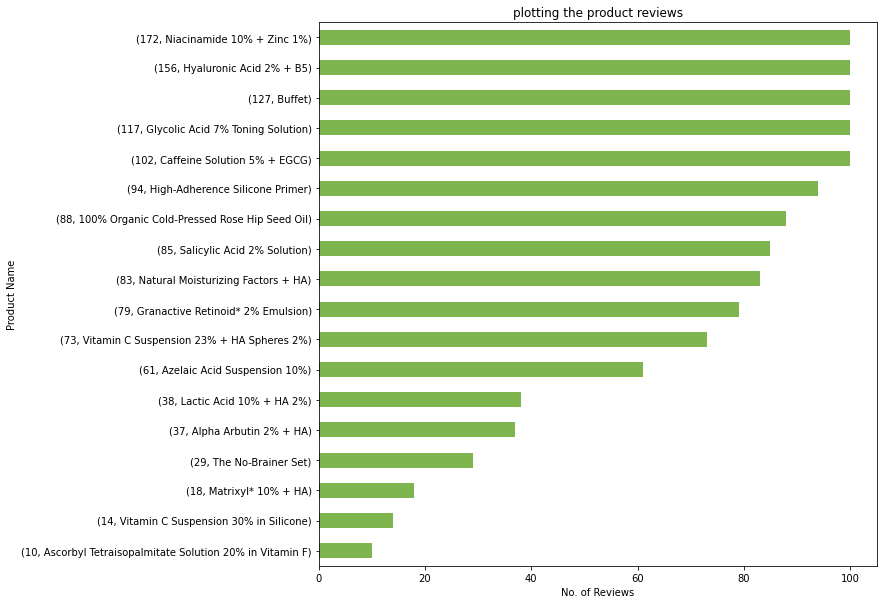

In [7]:
#plt.figure(figsize=(30,20))
df.groupby('p_num_reviews')['product'].value_counts().plot(kind = 'barh', figsize=(10,10), color = '#7eb54e')
plt.ylabel('Product Name')
plt.xlabel('No. of Reviews')
plt.title('plotting the product reviews')
plt.show()

In [8]:
cc = df.groupby('r_skintype')['r_skinconcerns'].value_counts()

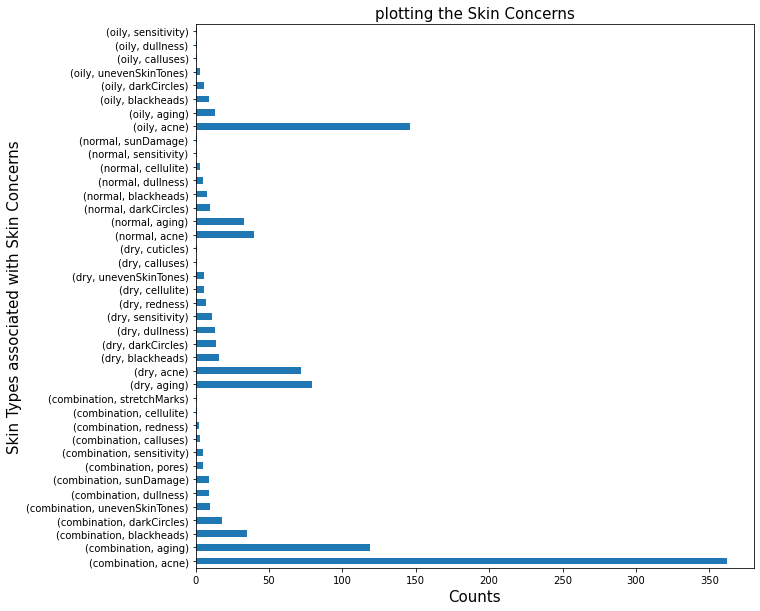

In [9]:
cc.plot(kind='barh', figsize=(10,10))
plt.ylabel('Skin Types associated with Skin Concerns', fontsize = 15)
plt.xlabel('Counts', fontsize = 15)
plt.title('plotting the Skin Concerns', fontsize = 15)
plt.show()

### Since we have missing values:

    - r_skintype         10
    - r_skinconcerns    123
### As much as the previous exploration is wel-defined, it is still not reliable.

### We conclude that the top problems for each skin type are the following:

    - Oily skin: Acne 
    - Normal skin: Acne & Aging
    - Dry skin: Acne & Aging 
    - Combination skin: Acne
### Assumptions: Acne products can be considered the most crucial line for all skin types. Additionally these types of products mark the highest revenue for the company.

### Aging products considered the second important line to the company, 

In [10]:
product_per_skinconcerns = df.groupby('r_skinconcerns')['product'].value_counts()
product_per_skinconcerns = pd.DataFrame(product_per_skinconcerns)
product_per_skinconcerns.head(30)

product
r_skinconcerns product                                                    
acne           Niacinamide 10% + Zinc 1%                                64
               Salicylic Acid 2% Solution                               57
               Glycolic Acid 7% Toning Solution                         51
               100% Organic Cold-Pressed Rose Hip Seed Oil              46
               Azelaic Acid Suspension 10%                              44
               Buffet                                                   44
               High-Adherence Silicone Primer                           44
               Hyaluronic Acid 2% + B5                                  44
               Vitamin C Suspension 23% + HA Spheres 2%                 40
               Caffeine Solution 5% + EGCG                              39
               Granactive Retinoid* 2% Emulsion                         38
               Alpha Arbutin 2% + HA                                    30
               Natural Moisturizing Factors + HA                        30
               Lactic Acid 10% + HA 2%                                  20
               The No-Brainer Set                                       10
               Matrixyl* 10% + HA                                        8
               Vitamin C Suspension 30% in Silicone                      7
               Ascorbyl Tetraisopalmitate Solution 20% in Vita...        4
aging          Buffet                                                   32
               Caffeine Solution 5% + EGCG                              30
               Granactive Retinoid* 2% Emulsion                         22
               Natural Moisturizing Factors + HA                        19
               High-Adherence Silicone Primer                           18
               Hyaluronic Acid 2% + B5                                  17
               100% Organic Cold-Pressed Rose Hip Seed Oil              16
               Glycolic Acid 7% Toning Solution                         16
               Vitamin C Suspension 23% + HA Spheres 2%                 14
               Niacinamide 10% + Zinc 1%                                12
               Lactic Acid 10% + HA 2%                                  11
               The No-Brainer Set                                       10

In [11]:
product_per_skinconcerns.tail(30)

product
r_skinconcerns  product                                             
sensitivity     100% Organic Cold-Pressed Rose Hip Seed Oil        2
                Caffeine Solution 5% + EGCG                        2
                Granactive Retinoid* 2% Emulsion                   2
                Hyaluronic Acid 2% + B5                            2
                Niacinamide 10% + Zinc 1%                          2
                Salicylic Acid 2% Solution                         2
                Azelaic Acid Suspension 10%                        1
                Buffet                                             1
                Vitamin C Suspension 23% + HA Spheres 2%           1
stretchMarks    Niacinamide 10% + Zinc 1%                          1
sunDamage       Buffet                                             2
                Hyaluronic Acid 2% + B5                            2
                Granactive Retinoid* 2% Emulsion                   1
                Niacinamide 10% + Zinc 1%                          1
                Salicylic Acid 2% Solution                         1
                The No-Brainer Set                                 1
                Vitamin C Suspension 23% + HA Spheres 2%           1
                Vitamin C Suspension 30% in Silicone               1
unevenSkinTones 100% Organic Cold-Pressed Rose Hip Seed Oil        2
                Glycolic Acid 7% Toning Solution                   2
                Hyaluronic Acid 2% + B5                            2
                Matrixyl* 10% + HA                                 2
                Natural Moisturizing Factors + HA                  2
                The No-Brainer Set                                 2
                Vitamin C Suspension 23% + HA Spheres 2%           2
                Alpha Arbutin 2% + HA                              1
                Azelaic Acid Suspension 10%                        1
                Buffet                                             1
                High-Adherence Silicone Primer                     1
                Salicylic Acid 2% Solution                         1

In [13]:
product_per_skincon = df.groupby('r_skintype')['product'].value_counts()
product_per_skincon = pd.DataFrame(product_per_skincon)
#product_per_skincon = pd.DataFrame(product_per_skincon, index_col=0)


In [14]:
product_per_skincon.columns = ['Skin Type']


In [15]:
product_per_skincon.head(30)

Skin Type
r_skintype  product                                                      
combination Buffet                                                     58
            Niacinamide 10% + Zinc 1%                                  54
            Glycolic Acid 7% Toning Solution                           52
            Hyaluronic Acid 2% + B5                                    51
            Caffeine Solution 5% + EGCG                                50
            100% Organic Cold-Pressed Rose Hip Seed Oil                48
            Salicylic Acid 2% Solution                                 48
            Granactive Retinoid* 2% Emulsion                           44
            High-Adherence Silicone Primer                             39
            Azelaic Acid Suspension 10%                                38
            Vitamin C Suspension 23% + HA Spheres 2%                   33
            Natural Moisturizing Factors + HA                          30
            Alpha Arbutin 2% + HA                                      24
            Lactic Acid 10% + HA 2%                                    24
            The No-Brainer Set                                         17
            Matrixyl* 10% + HA                                         11
            Ascorbyl Tetraisopalmitate Solution 20% in Vita...          9
            Vitamin C Suspension 30% in Silicone                        6
dry         Natural Moisturizing Factors + HA                          33
            Hyaluronic Acid 2% + B5                                    31
            Buffet                                                     24
            High-Adherence Silicone Primer                             21
            100% Organic Cold-Pressed Rose Hip Seed Oil                20
            Caffeine Solution 5% + EGCG                                20
            Vitamin C Suspension 23% + HA Spheres 2%                   19
            Granactive Retinoid* 2% Emulsion                           16
            Glycolic Acid 7% Toning Solution                           13
            Salicylic Acid 2% Solution                                 12
            Niacinamide 10% + Zinc 1%                                  10
            Lactic Acid 10% + HA 2%                                     8

In [16]:
product_per_skinconcerns.tail(30)

product
r_skinconcerns  product                                             
sensitivity     100% Organic Cold-Pressed Rose Hip Seed Oil        2
                Caffeine Solution 5% + EGCG                        2
                Granactive Retinoid* 2% Emulsion                   2
                Hyaluronic Acid 2% + B5                            2
                Niacinamide 10% + Zinc 1%                          2
                Salicylic Acid 2% Solution                         2
                Azelaic Acid Suspension 10%                        1
                Buffet                                             1
                Vitamin C Suspension 23% + HA Spheres 2%           1
stretchMarks    Niacinamide 10% + Zinc 1%                          1
sunDamage       Buffet                                             2
                Hyaluronic Acid 2% + B5                            2
                Granactive Retinoid* 2% Emulsion                   1
                Niacinamide 10% + Zinc 1%                          1
                Salicylic Acid 2% Solution                         1
                The No-Brainer Set                                 1
                Vitamin C Suspension 23% + HA Spheres 2%           1
                Vitamin C Suspension 30% in Silicone               1
unevenSkinTones 100% Organic Cold-Pressed Rose Hip Seed Oil        2
                Glycolic Acid 7% Toning Solution                   2
                Hyaluronic Acid 2% + B5                            2
                Matrixyl* 10% + HA                                 2
                Natural Moisturizing Factors + HA                  2
                The No-Brainer Set                                 2
                Vitamin C Suspension 23% + HA Spheres 2%           2
                Alpha Arbutin 2% + HA                              1
                Azelaic Acid Suspension 10%                        1
                Buffet                                             1
                High-Adherence Silicone Primer                     1
                Salicylic Acid 2% Solution                         1

In [17]:
xx = product_per_skincon.iloc[product_per_skincon['r_skintype'] == 'combination', 'product']
xx

KeyError: 'r_skintype'

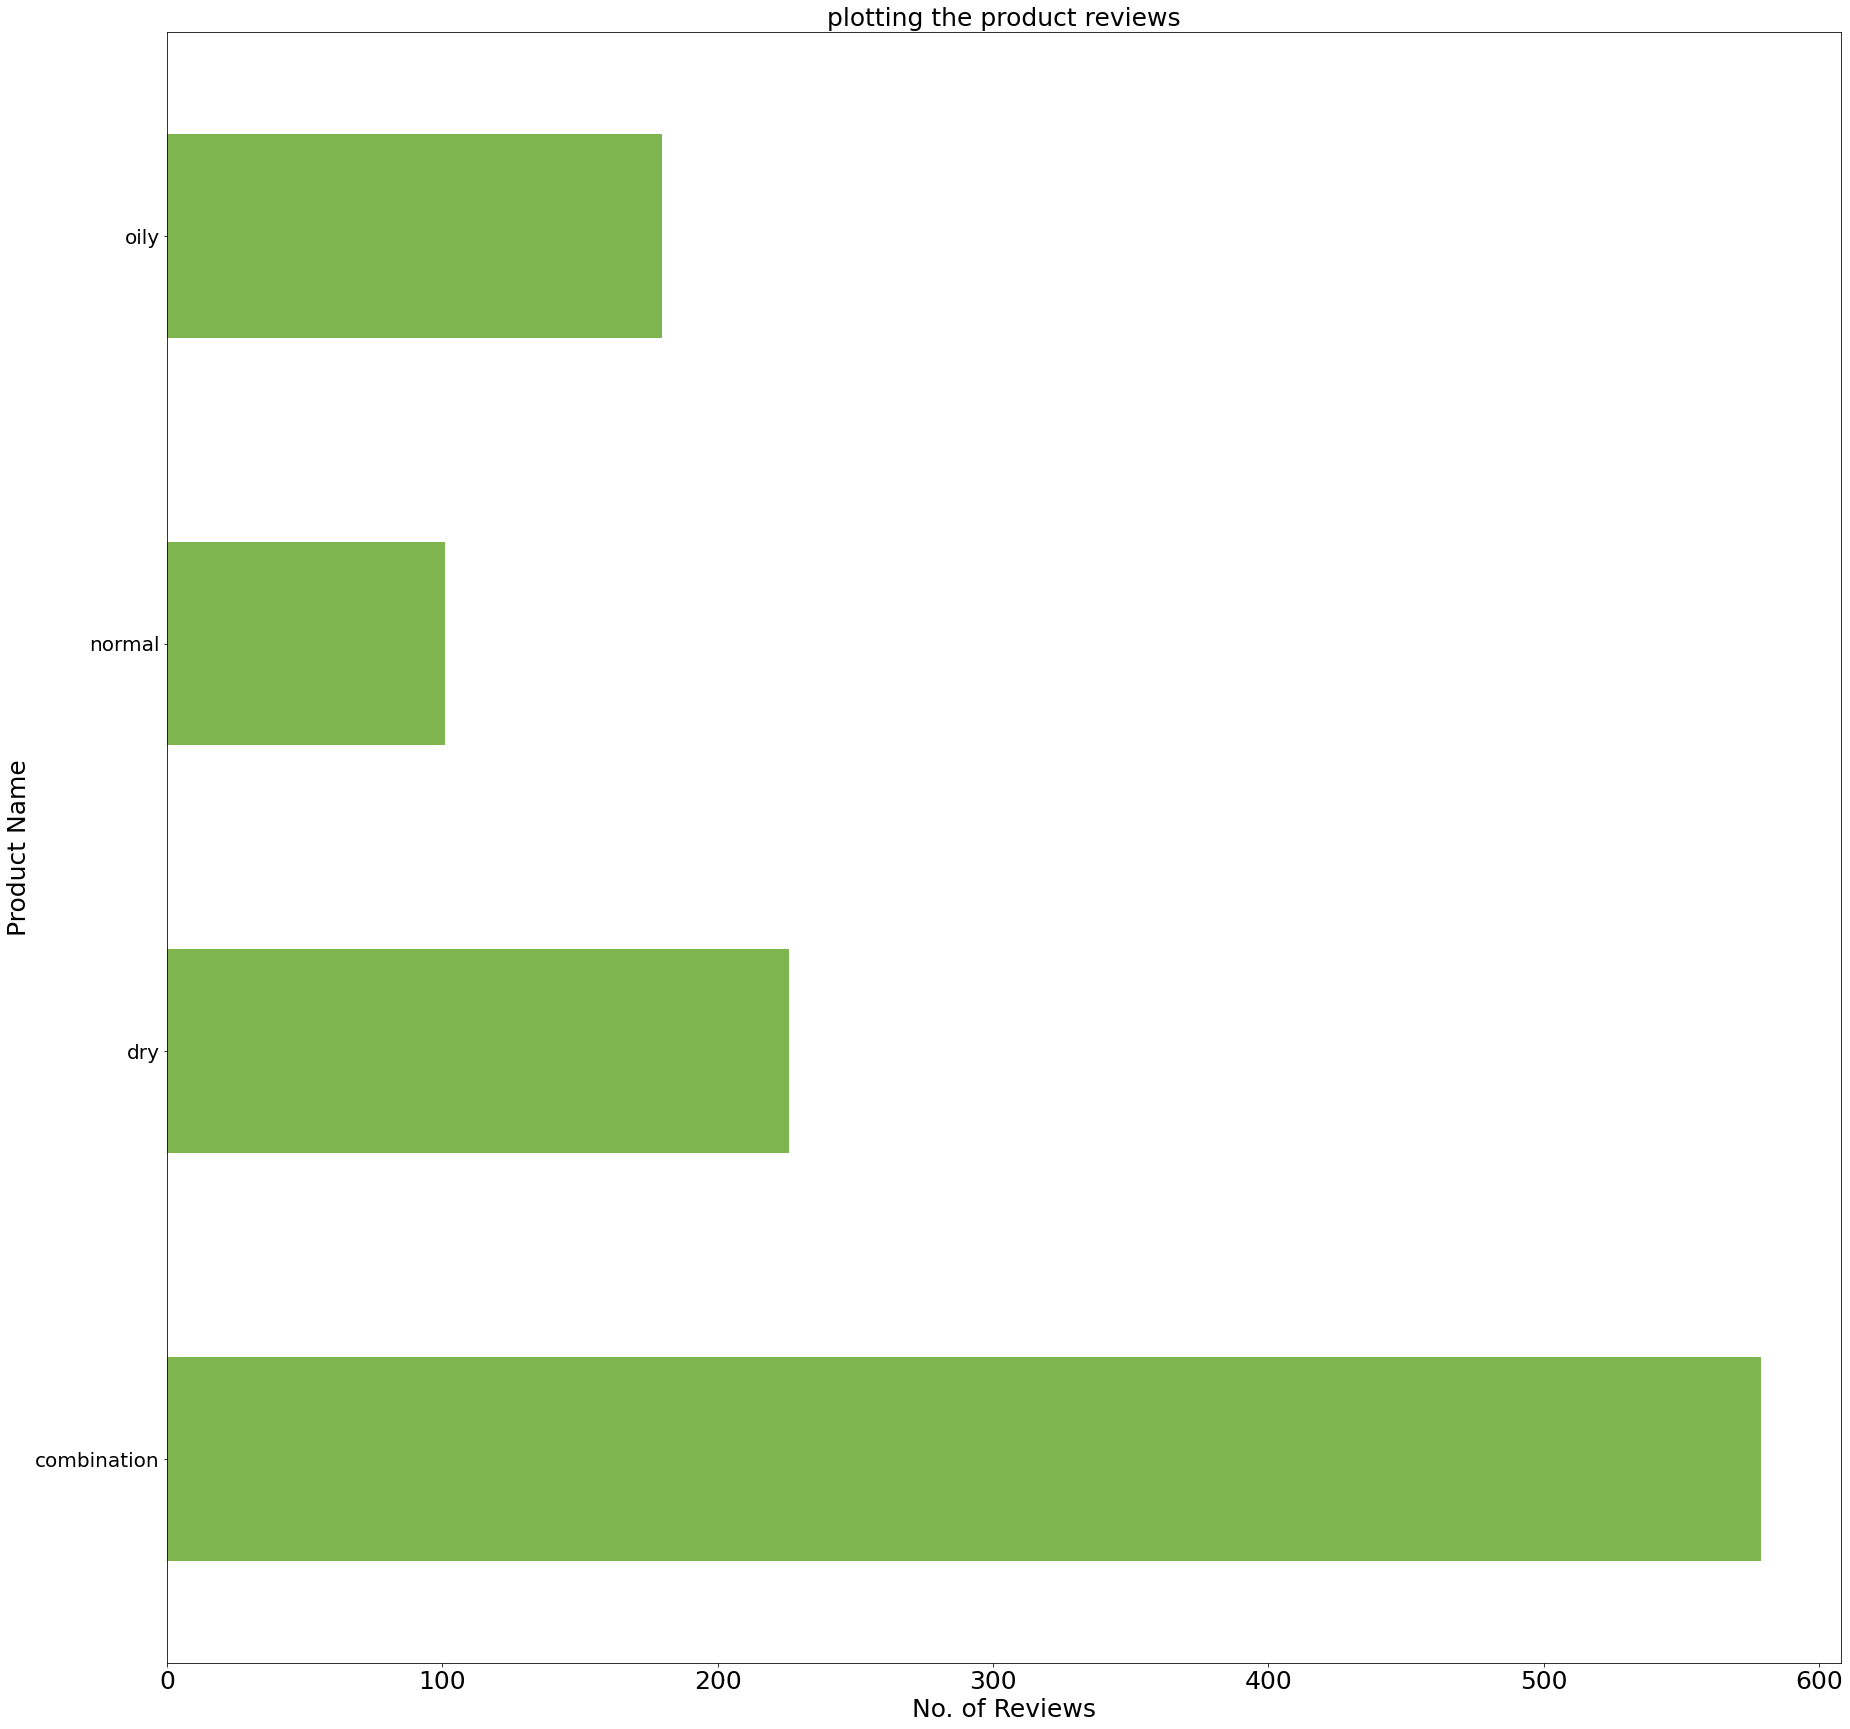

In [18]:
df.groupby('r_skintype')['r_skinconcerns'].count().plot(kind = 'barh', figsize=(30,30), color = '#7eb54e')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 20)
plt.ylabel('Product Name', fontsize = 25)
plt.xlabel('No. of Reviews', fontsize = 25)
plt.title('plotting the product reviews', fontsize = 25)
plt.show()

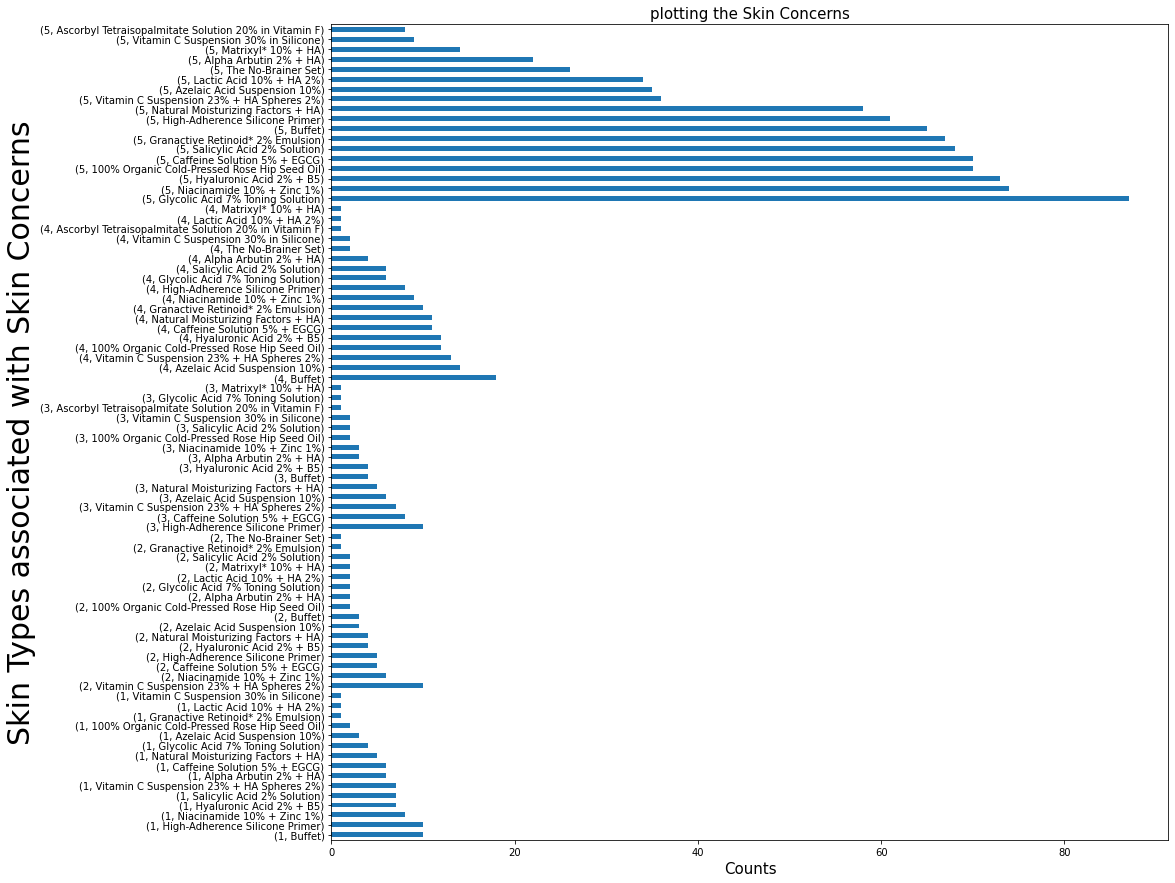

In [19]:
df.groupby('r_star')['product'].value_counts().plot(kind = 'barh', figsize = (15,15))
plt.ylabel('Skin Types associated with Skin Concerns', fontsize = 30)
plt.xlabel('Counts', fontsize = 15)
plt.title('plotting the Skin Concerns', fontsize = 15)
plt.show()

In [20]:

for i in x:
    if df['r_star'] == '5':
        print(df['r_star'])
    else:
        print('0')
        
        

NameError: name 'x' is not defined

In [21]:

df.groupby(dd)['product'].value_counts()

NameError: name 'dd' is not defined

# References:  "Remember to add a text file with your references:"

    - Python Tips — Pandas Concat & Append: https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-5-pandas-concat-append-dev-skrol-18e4950cc8cc
    - 